#  2 SimpleLinear Regression
 2.1 Problem 1
 1. Do anexploratory data analysis on the iris dataset from seaborn library.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
iris = sns.load_dataset('iris')

# Display the first few rows of the dataset
print(iris.head())

# Check the shape of the dataset
print(f"Dataset shape: {iris.shape}")

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
Dataset shape: (150, 5)


In [2]:
# Check for missing values
print(iris.isnull().sum())

# Check the data types of the columns
print(iris.info())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [3]:
# Generate summary statistics for numeric columns
print(iris.describe())

# Generate summary statistics for categorical columns
print(iris['species'].value_counts())


       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


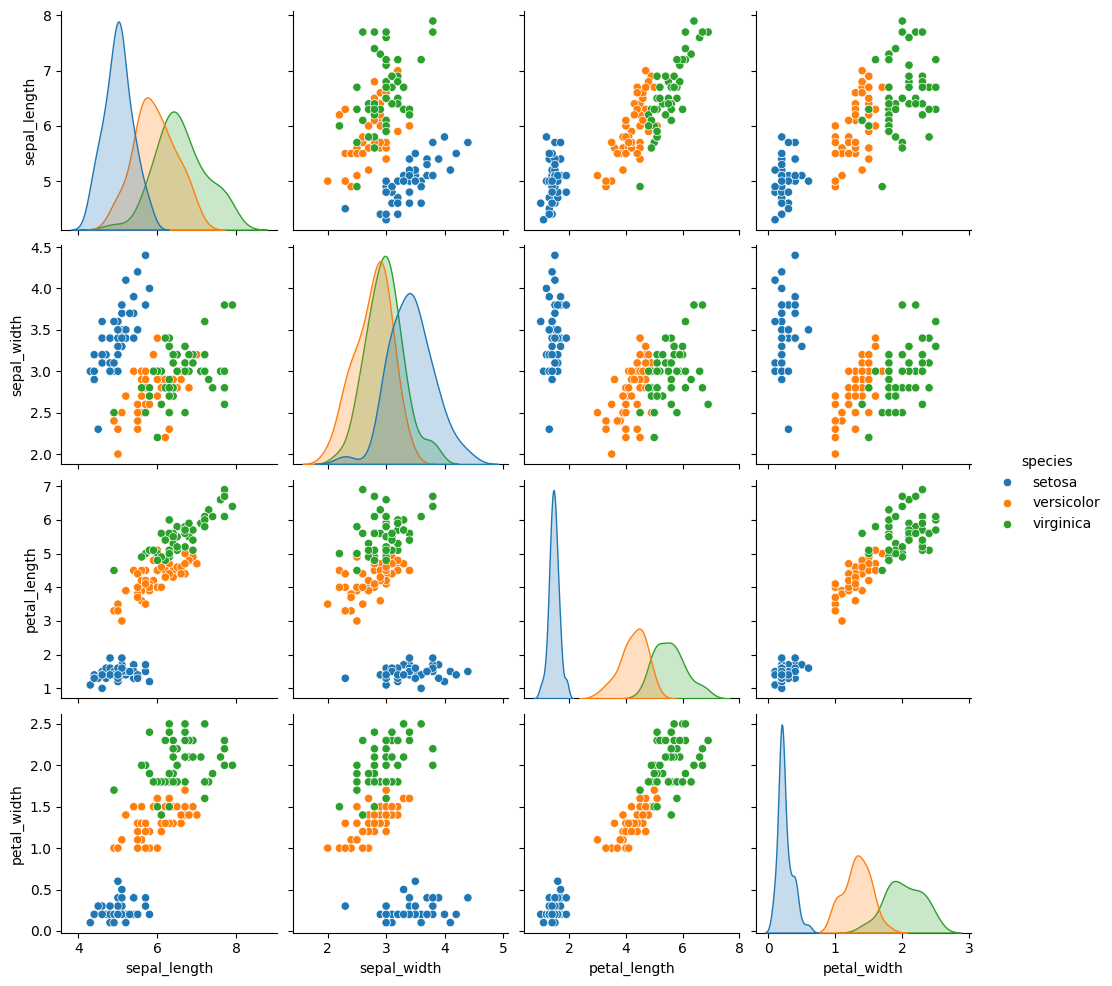

In [4]:
sns.pairplot(iris, hue='species', diag_kind='kde', height=2.5)
plt.show()


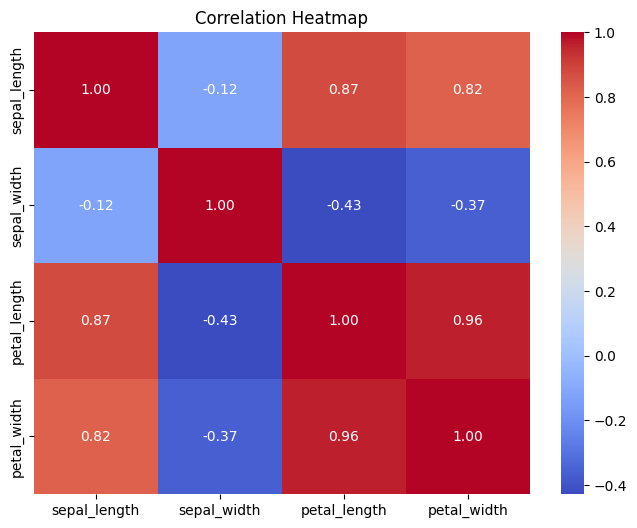

In [5]:
import numpy as np
# Compute the correlation matrix
corr_matrix = iris.drop('species', axis=1).corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


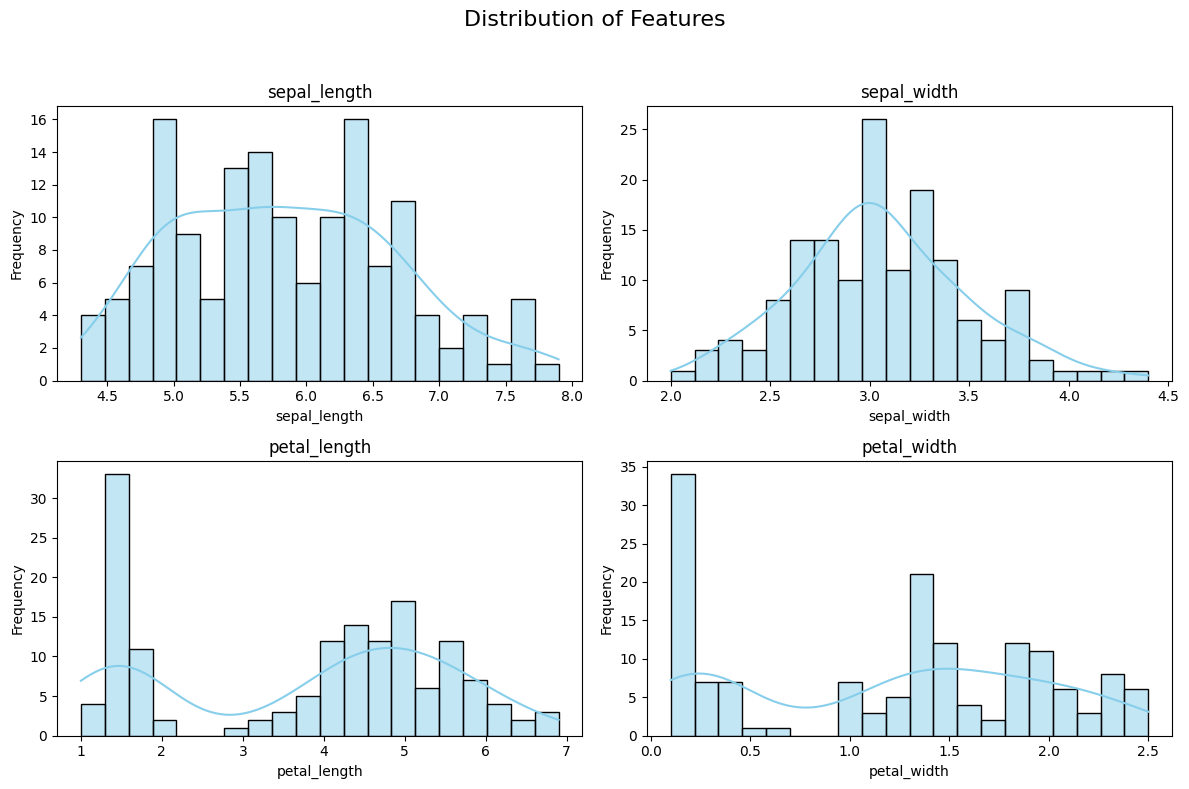

In [6]:
# Features to plot
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Set up the grid layout
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns
fig.suptitle('Distribution of Features', fontsize=16)

# Plot each feature on its respective subplot
for ax, feature in zip(axes.flat, features):
    sns.histplot(iris[feature], kde=True, bins=20, color='skyblue', ax=ax)
    ax.set_title(f'{feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

# Adjust layout for better visualization
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the suptitle
plt.show()



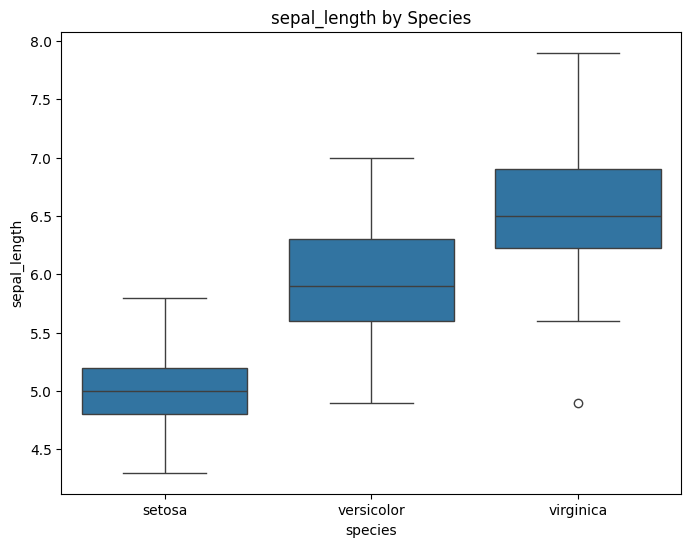

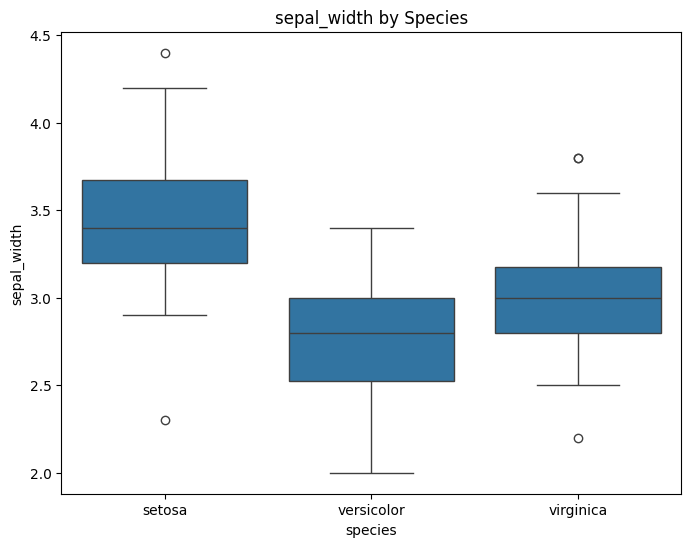

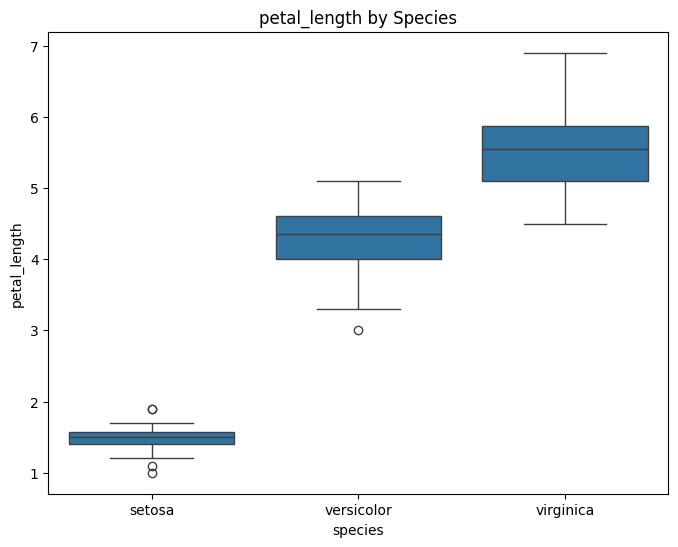

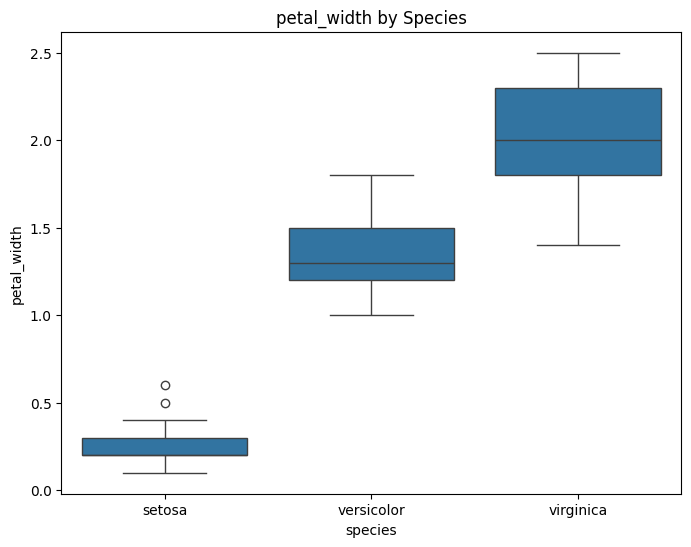

In [7]:
# Box plots grouped by species
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=iris, x='species', y=feature)
    plt.title(f'{feature} by Species')
    plt.show()


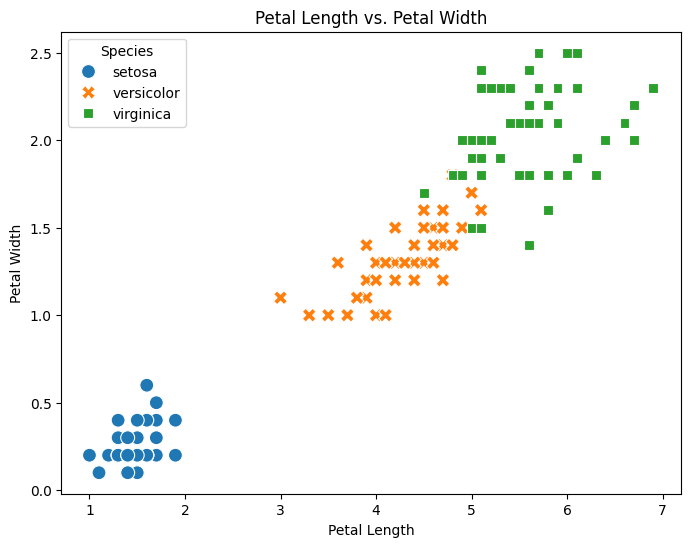

In [8]:
# Scatter plot for petal_length vs petal_width
plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', style='species', s=100)
plt.title('Petal Length vs. Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(title='Species')
plt.show()


 2. First use scikit-learn and next use PyTorch to build simple linear regression and do all the neccessary things in machine learning process.
  * Feature: petal_length
  * Target: petal_width

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Extract feature and target
X = iris[['petal_length']]  # Feature
y = iris['petal_width']     # Target



In [10]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training size: {len(X_train)}, Testing size: {len(X_test)}")


Training size: 120, Testing size: 30


In [11]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Model coefficients
print(f"Coefficient: {model.coef_[0]:.2f}, Intercept: {model.intercept_:.2f}")


Coefficient: 0.41, Intercept: -0.36


In [12]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 0.05
R² Score: 0.93


In [13]:
import pickle

with open("../Model/model2_1.pkl", "wb") as file:
    pickle.dump(model, file)

In [14]:
import torch
import torch.nn as nn
# from torch.utils.data import DataLoader, TensorDataset

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train.values, dtype=torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)


In [15]:
class SimpleLinearRegression(nn.Module):
    def __init__(self):
        super(SimpleLinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # 1 feature, 1 target

    def forward(self, x):
        return self.linear(x)

# Initialize the model
model = SimpleLinearRegression()


In [16]:
# Loss function
criterion = nn.MSELoss()

# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


In [24]:
# Training loop
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    y_pred_tensor = model(X_train)
    loss = criterion(y_pred_tensor, y_train.unsqueeze(1))

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [100/1000], Loss: 0.2489
Epoch [200/1000], Loss: 0.1457
Epoch [300/1000], Loss: 0.0938
Epoch [400/1000], Loss: 0.0677
Epoch [500/1000], Loss: 0.0545
Epoch [600/1000], Loss: 0.0479
Epoch [700/1000], Loss: 0.0446
Epoch [800/1000], Loss: 0.0429
Epoch [900/1000], Loss: 0.0421
Epoch [1000/1000], Loss: 0.0416


In [ ]:
# Evaluate on test set
with torch.no_grad():
    y_test_pred = model(X_test_tensor)
    test_loss = criterion(y_test_pred, y_test_tensor)

print(f"Test Loss: {test_loss.item():.4f}")


Test Loss: 0.1108


In [25]:
from sklearn.metrics import r2_score
# Evaluation
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    acc = r2_score(y_test.unsqueeze(1).cpu().numpy(), y_pred.cpu().numpy())
    print("\nTest R2 Score:", acc)


Test R2 Score: 0.926641583442688


In [26]:
torch.save(model, "../Model/model2.pth")